In [2]:
import pyabf
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit as cf
import os
import scipy.signal as sig
from matplotlib.widgets import Slider
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
#---------- Dopasowywana funkcja ----------#  
def kochambiofizyke(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

#---------- Wybieranie tylko plików z rozszerzeniem .abf ----------#  
files = np.sort(os.listdir('NOWE_ZAPISY'))
files_names = [n for n in files if '.abf' in n]


#---------- zapisywanie danych z plików do tablic ----------#  
xs = []
ys = []
for i in files_names:
    abf = pyabf.ABF(f'NOWE_ZAPISY/{i}')
    abf.setSweep(0)
    if np.mean(abf.sweepY) < 0 :
         ys.append(-abf.sweepY)
    else:
        ys.append(abf.sweepY)
    xs.append(abf.sweepX)

ys[0] = ys[0][xs[0]>2]
xs[0] = xs[0][xs[0]>2]


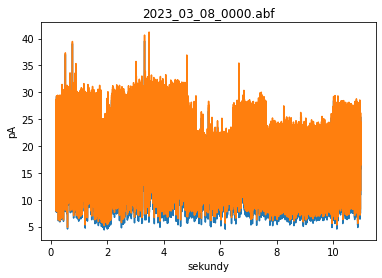

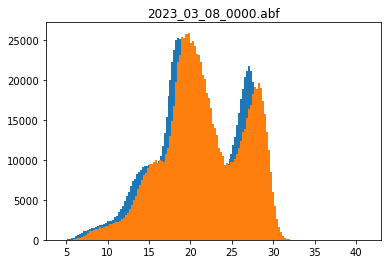

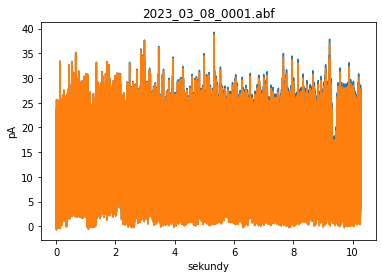

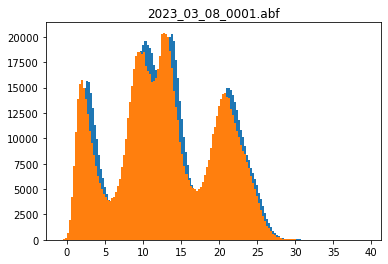

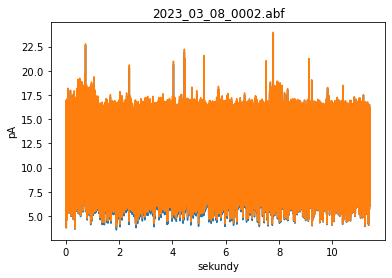

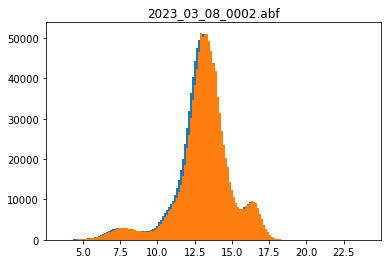

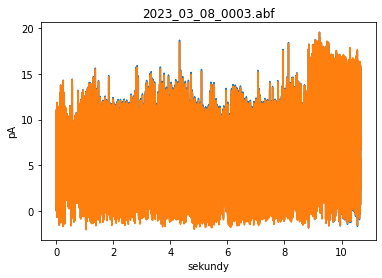

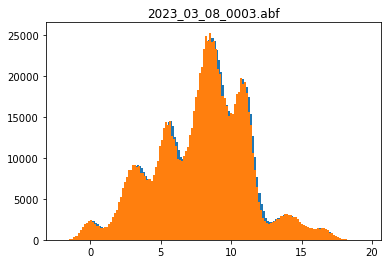

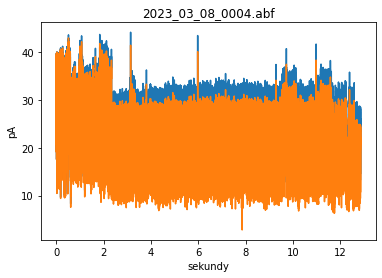

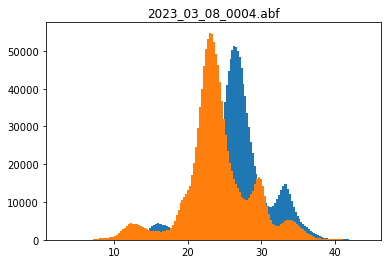

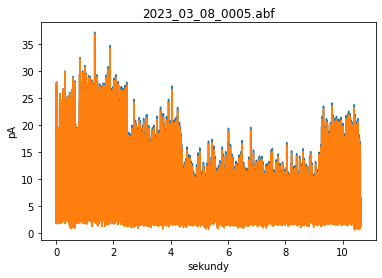

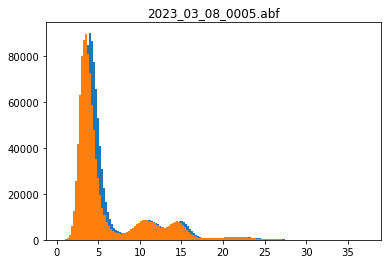

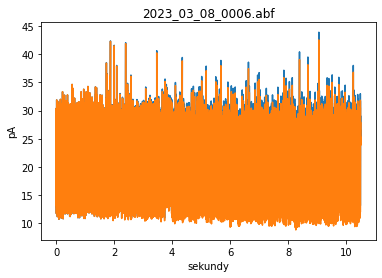

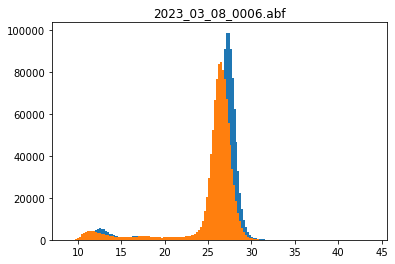

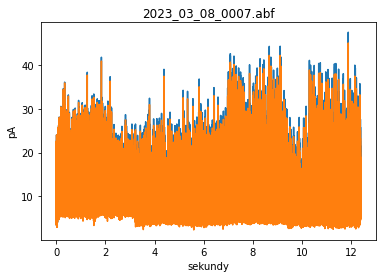

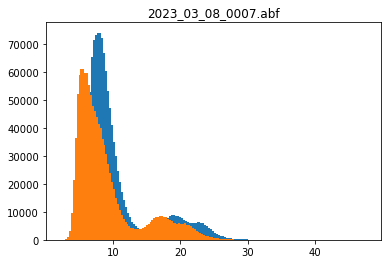

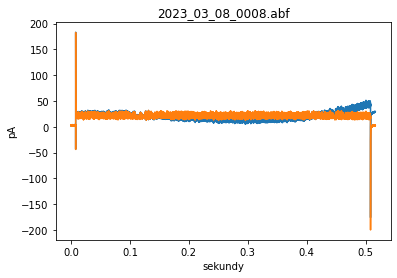

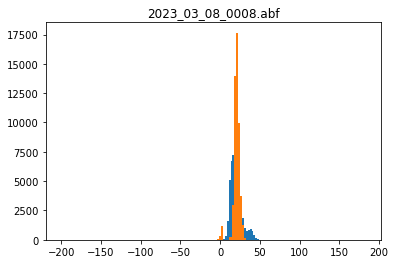

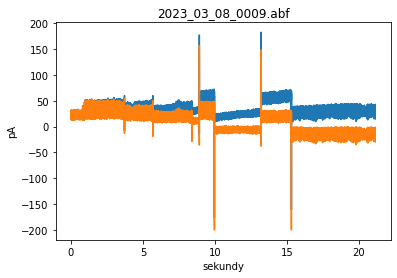

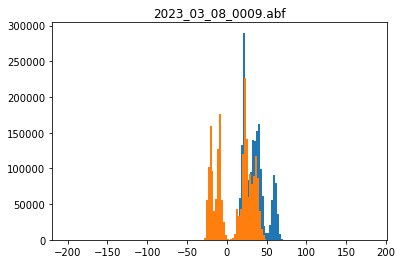

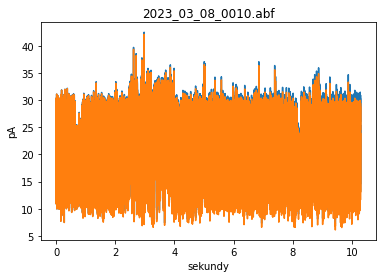

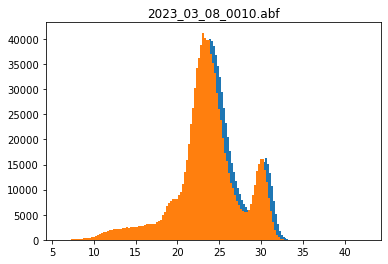

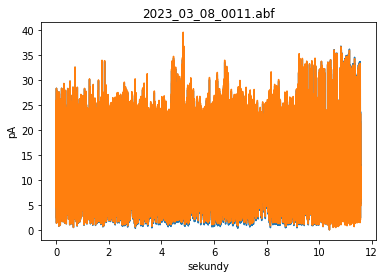

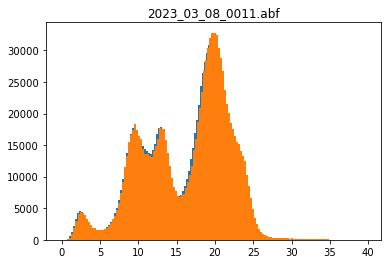

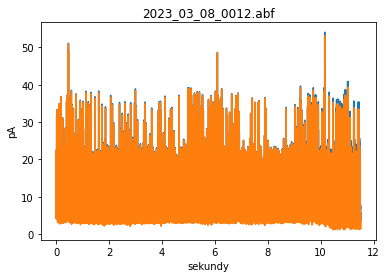

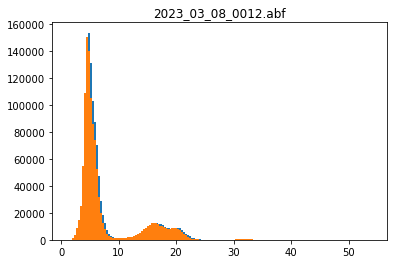

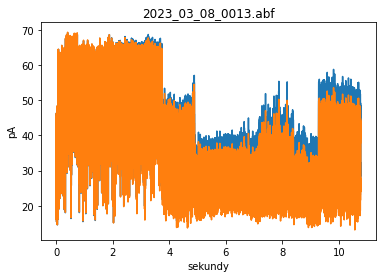

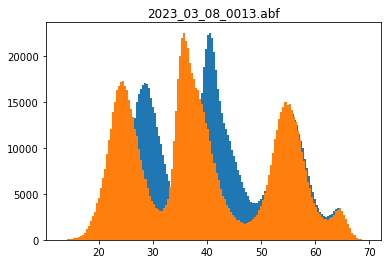

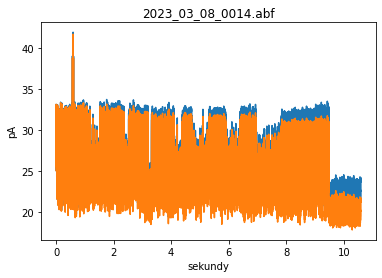

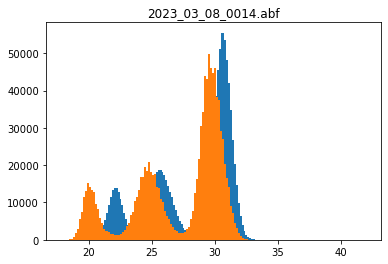

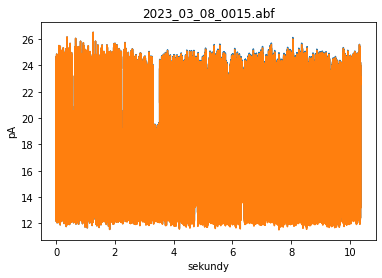

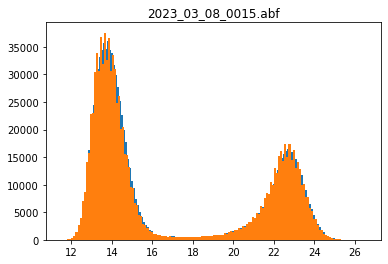

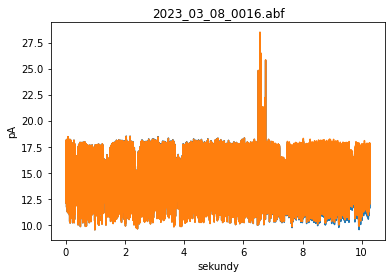

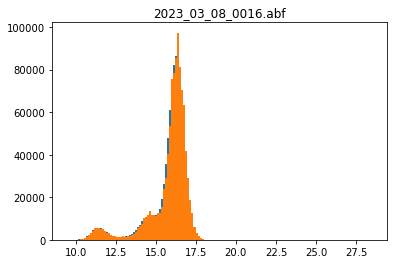

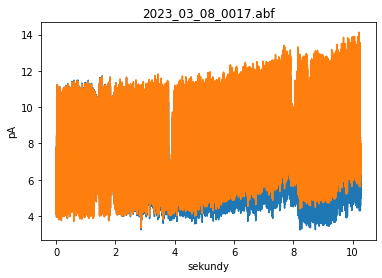

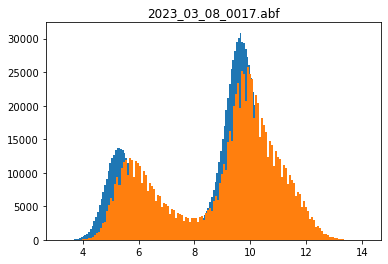

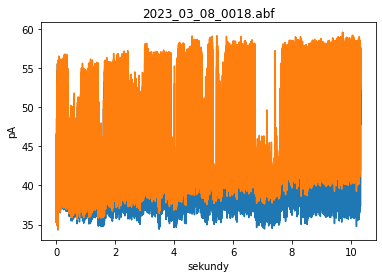

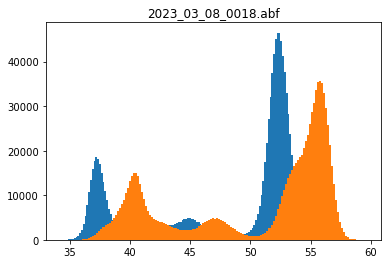

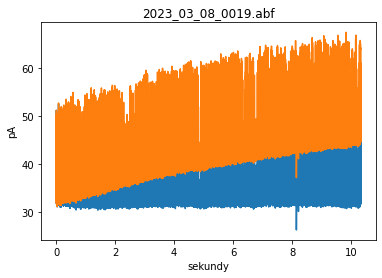

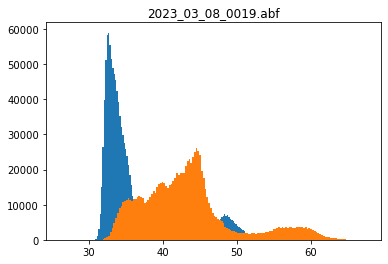

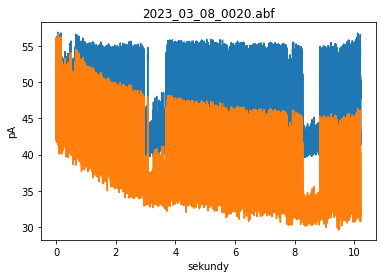

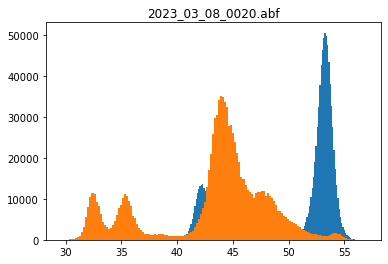

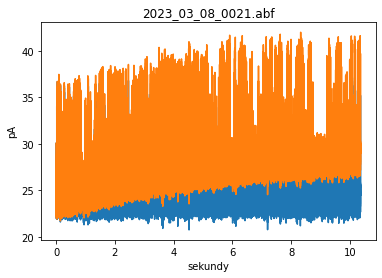

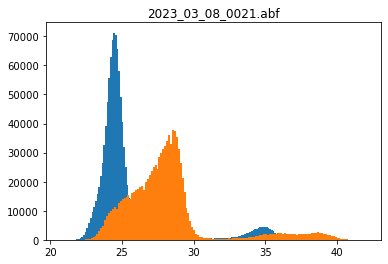

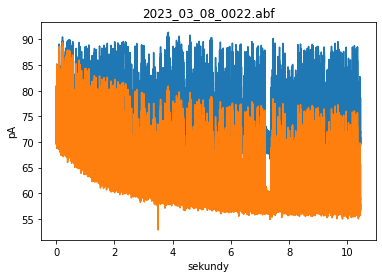

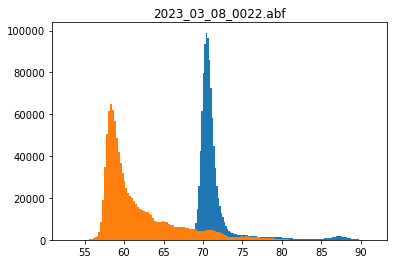

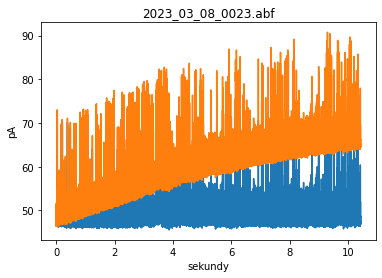

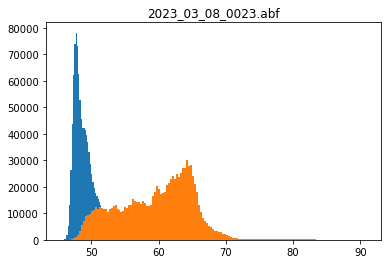

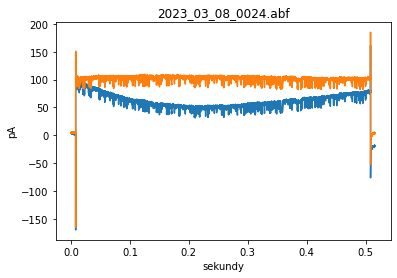

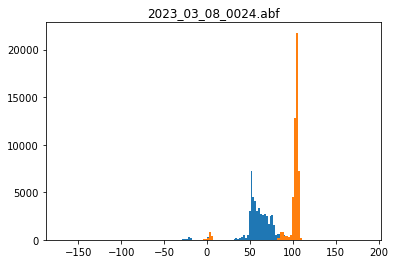

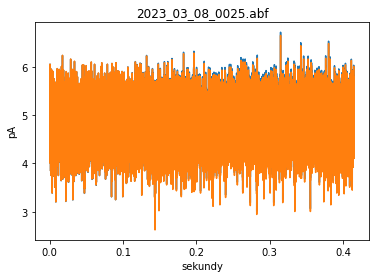

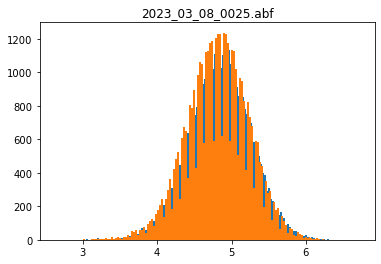

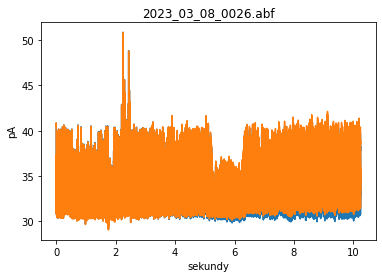

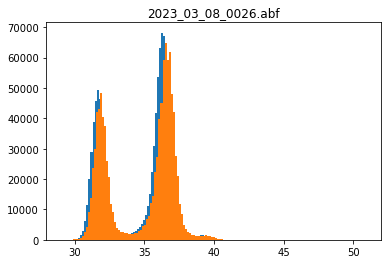

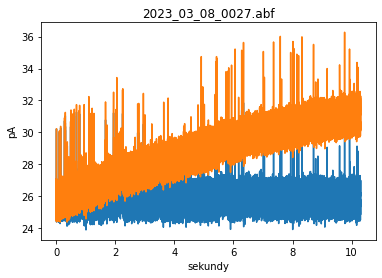

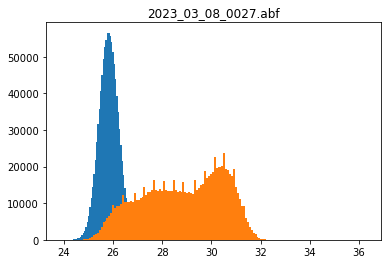

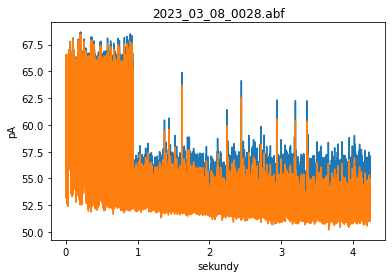

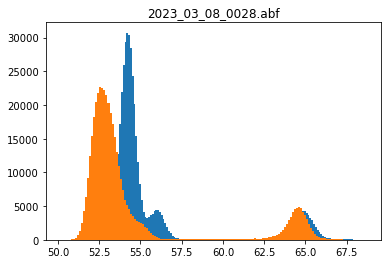

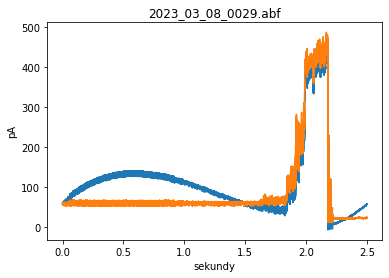

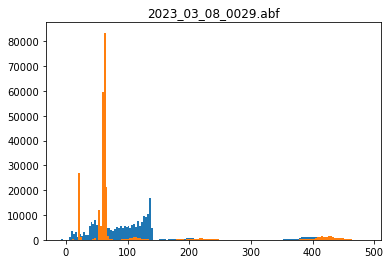

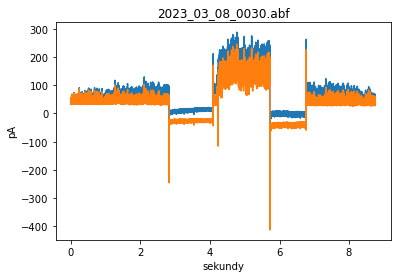

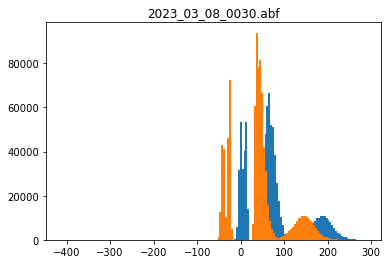

In [4]:
ys1 = []
tablica_zlych_danych = ['0000', '0008', '0009', '0024', '0025']
for i in range(len(files_names)):
        x = xs[i]
        y = ys[i]

        mins = [np.min(k) for k in np.array_split(y, 100)]
        xx = np.linspace(0, np.max(x), 100)
        z = cf(kochambiofizyke, xx, mins)[0]

        y1 = y - kochambiofizyke(x, *z) + z[3]
        ys1.append(y1)

        plt.plot(x/10, y1)
        plt.plot(x/10, y)
        # plt.plot(x, y)
        # plt.plot(x, kochambiofizyke(x, *z))
        # #plt.plot(xx, mins)
        plt.xlabel("sekundy")
        plt.ylabel("pA")
        plt.title(files[i])
        plt.show()

        plt.hist(y1, bins = 150)
        plt.hist(y, bins = 150)

        plt.title(files[i])
        plt.show()

In [4]:
sett = 5 # wybor pliku
def plot1(zakres):
    plt.figure(figsize=(20, 10))
    plt.plot(xs[sett], ys1[sett])
    plt.xlim(zakres, zakres+1)

interact(plot1, zakres = widgets.FloatSlider(value=70,
                                               min=0,
                                               max=xs[sett][-1]-1,
                                               step=0.1) )


interactive(children=(FloatSlider(value=70.0, description='zakres', max=105.24990000000001), Output()), _dom_c…

<function __main__.plot1(zakres)>